In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 

from datetime import datetime

%matplotlib inline

In [2]:
exp_name = 'gpyopt'

In [3]:
data = pd.read_csv('../{}/meta.csv'.format(exp_name))
print(data.head())

   id          time  test_loss  epochs  accuracy  depth  dense_neurons  \
0   1  1.587588e+09   4.605484      11   0.00875      3            149   
1   2  1.587588e+09   2.804928      58   0.30700      2            145   
2   3  1.587588e+09   3.164613      57   0.29275      2            146   
3   4  1.587588e+09   3.097328      46   0.29350      2            161   
4   5  1.587588e+09   3.141611      50   0.27025      2            100   

   init_filters  use_batchnorm   dropout  batch_size  learning_rate     beta1  \
0            30          False  0.395043         512       0.007702  0.549573   
1            22          False  0.529862        1024       0.005429  0.525787   
2            17          False  0.521588        1024       0.006334  0.531773   
3            25          False  0.480618         512       0.006023  0.474229   
4            14          False  0.353280        1024       0.007971  0.525660   

      beta2  max_epochs  
0  0.967181         100  
1  0.974277     

In [4]:
data['ntime'] = pd.to_datetime(data['time'])

In [5]:
data['time'] = data['time'].apply(datetime.fromtimestamp)

In [6]:
image_path = 'images/{}/'.format(exp_name)
if not os.path.exists(image_path):
    os.makedirs(image_path)
    
image_path = 'images/{}/{}_'.format(exp_name, exp_name)

C:\Users\dmris\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


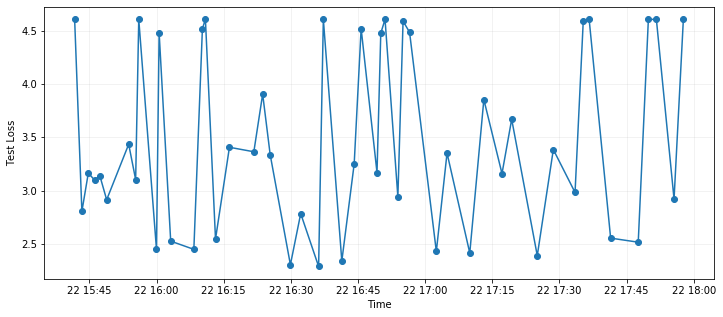

In [7]:
plt.figure(figsize=(12,5))
plt.plot(data['time'], data['test_loss'], marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Test Loss')
plt.savefig(image_path + 'test_loss_over_iters.png', bbox_inches='tight')

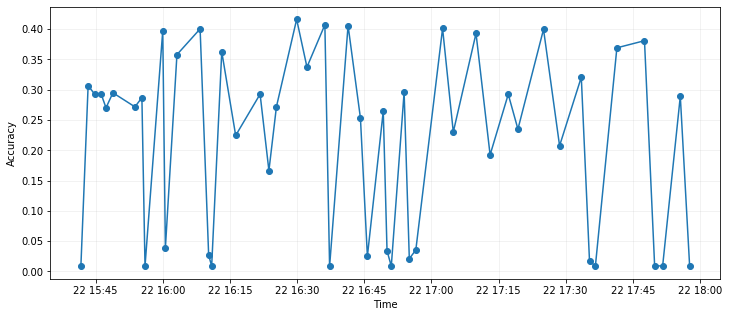

In [8]:
plt.figure(figsize=(12,5))
plt.plot(data['time'], data['accuracy'], marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.savefig(image_path + 'accuracy_over_iters.png', bbox_inches='tight')

In [9]:
best_loss = [min(data['test_loss'][:i]) for i in range(1,len(data))]
best_acc = [max(data['accuracy'][:i]) for i in range(1,len(data))]

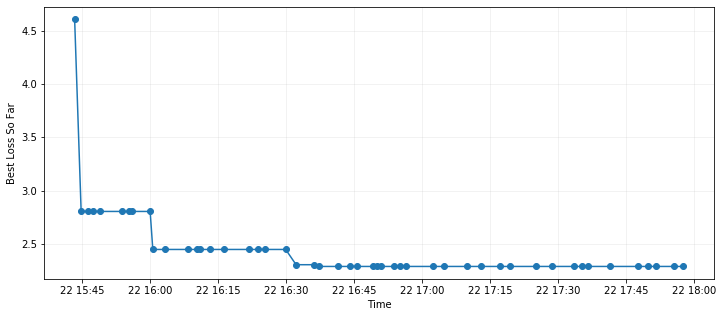

In [10]:
plt.figure(figsize=(12,5))
plt.plot(data['time'][1:], best_loss, marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Best Loss So Far')
plt.savefig(image_path + 'best_loss_so_far_over_iters.png', bbox_inches='tight')

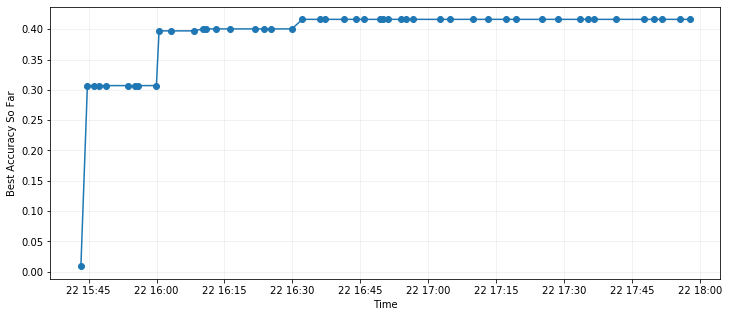

In [11]:
plt.figure(figsize=(12,5))
plt.plot(data['time'][1:], best_acc, marker='o')
plt.grid(alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Best Accuracy So Far')
plt.savefig(image_path + 'best_acc_so_far_over_iters.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12,12))
plot_vars = ['batch_size', 'learning_rate', 'max_epochs', 'dropout', 'beta1', 'beta2', 'depth', 'init_filters']

for i,plot in enumerate(plot_vars):
    plt.subplot(4,2,i+1)
    plt.plot(data['time'], data[plot], marker='o')
    plt.grid(alpha=0.2)
    plt.ylabel(plot)
    
plt.tight_layout()
plt.savefig(image_path + 'parameter_tuning.png', bbox_inches='tight')

In [ ]:
best_trial = data['id'].values[np.argmin(data['test_loss'].values)]
best_metrics = pd.read_csv('../{}/metrics/metrics.{}.csv'.format(exp_name, best_trial))

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(best_metrics['train_loss'], label='Train', marker='o')
plt.plot(best_metrics['valid_loss'], label='Valid.', marker='o')
plt.grid(alpha=0.2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.savefig(image_path + 'best_training_loss.png', bbox_inches='tight')

In [ ]:
data.iloc[best_trial-1]